# 1. Gradient Descent cho bài toán Linear Regression
## 1.1. Giải quyết bài toán Linear Regression bằng thư viện Sklearn

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(2)

* Cho đường thẳng:
  $$y = 4 + 3x$$
  ![](./images/00.01.png)

In [126]:
X = np.random.rand(1000)
y = 4 + 3*X + 0.5*np.random.randn(1000)

In [127]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1))

LinearRegression()

In [128]:
w, b = model.coef_[0, 0], model.intercept_[0]
sol_sklearn = np.array([b, w])

print(f"Solution found by sklearn: {sol_sklearn}")

Solution found by sklearn: [4.01792876 2.9556481 ]


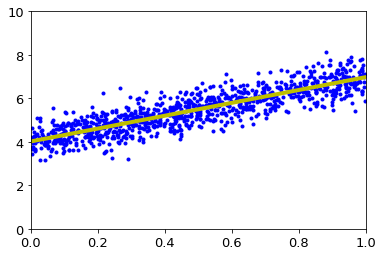

In [129]:
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w*x0 + b

plt.tick_params(axis='both', which='major', labelsize=13)
plt.plot(X, y, 'b.')
plt.plot(x0, y0, 'y', linewidth=4)
plt.axis([0, 1, 0, 10])
plt.show()

## 1.2. Kiểm tra đạo hàm hai phía

In [130]:
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis=1)

In [131]:
Xbar[:5]

array([[1.        , 0.4359949 ],
       [1.        , 0.02592623],
       [1.        , 0.54966248],
       [1.        , 0.43532239],
       [1.        , 0.4203678 ]])

In [132]:
# Đạo hàm của hàm mất mát
def grad(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)


# Hàm chi phí
def cost(w):
    N = Xbar.shape[0]
    return 0.5/N * np.linalg.norm(y - Xbar.dot(w))**2

In [133]:
def checkGrad(cost_fnc, grad_fnc, w):
    """
    Dùng để kiểm tra đạo hàm theo phương pháp kiểm tra theo 2 phía
    Args:
        cost_fnc ([type]): hàm chi phí
        grad_fnc ([type]): đạo hàm
        w ([type]): tham số của hàm
    """
    w_flat = w.reshape(-1) # chuyển w thành mảng 1 chiều
    shape_w = w.shape # lấy shape của w
    eps = 1e-6
    grad_approximate_flat = np.zeros_like(w_flat) # đạo hàm gần đúng
    grad_approximate = np.zeros_like(w) # đạo hàm gần đúng nhưng true shape
    
    for i in range(w_flat.shape[0]):
        grad_right = w_flat.copy()
        grad_left = w_flat.copy()
        grad_right[i] += eps
        grad_left[i] -= eps
        w_right = grad_right.reshape(shape_w) 
        w_left = grad_left.reshape(shape_w)
        grad_approximate_flat[i] = (cost_fnc(grad_right) - cost_fnc(grad_left))/(2*eps)
        
    grad_approximate = grad_approximate_flat.reshape(shape_w)
    diff = np.linalg.norm(grad_approximate - grad_fnc(w)) # tính khoảng cách euclid giữa hai đạo hàm
    
    print(f"Difference between two methods should be small: {diff}.")
    print(f"Approved this gradient: {diff < 1e-6}.")        

In [134]:
checkGrad(cost, grad, np.random.randn(2))

Difference between two methods should be small: 1.0026350668287549e-09.
Approved this gradient: True.


## 1.3. Giải quyết bài toán Linear Regression bằng Gradient Descent

In [135]:
def GD(grad_fnc, x0, eta):
    """
    Gradient descent cho hàm nhiều biến

    Args:
        grad_fnc (def): đạo hàm
        x0 (np.array): x0 khởi tạo
        eta (float): learning rate
    """
    x = [x0]
    for _ in range(100):
        x_new = x[-1] - eta*grad_fnc(x[-1])
        if np.linalg.norm(grad_fnc(x_new)) / np.array(x0).size < 1e-3:
            break
        
        x.append(x_new)
        
    return x

In [136]:
Xbar[:5]

array([[1.        , 0.4359949 ],
       [1.        , 0.02592623],
       [1.        , 0.54966248],
       [1.        , 0.43532239],
       [1.        , 0.4203678 ]])

In [137]:
w_init = np.array([2, 1])
w1 = GD(grad, w_init, 1)

print(f"Solution found by GD: w = {w1[-1]}, after {len(w1)} iteration")

Solution found by GD: w = [4.03322526 2.92628104], after 49 iteration
